In [1]:
from sklearn.datasets import load_diabetes

In [3]:
dataset = load_diabetes()

In [5]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
import pandas as pd
df_diabetes = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [9]:
x=df_diabetes
y=dataset['target']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [13]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [19]:
import matplotlib.pyplot as plt

<Axes: >

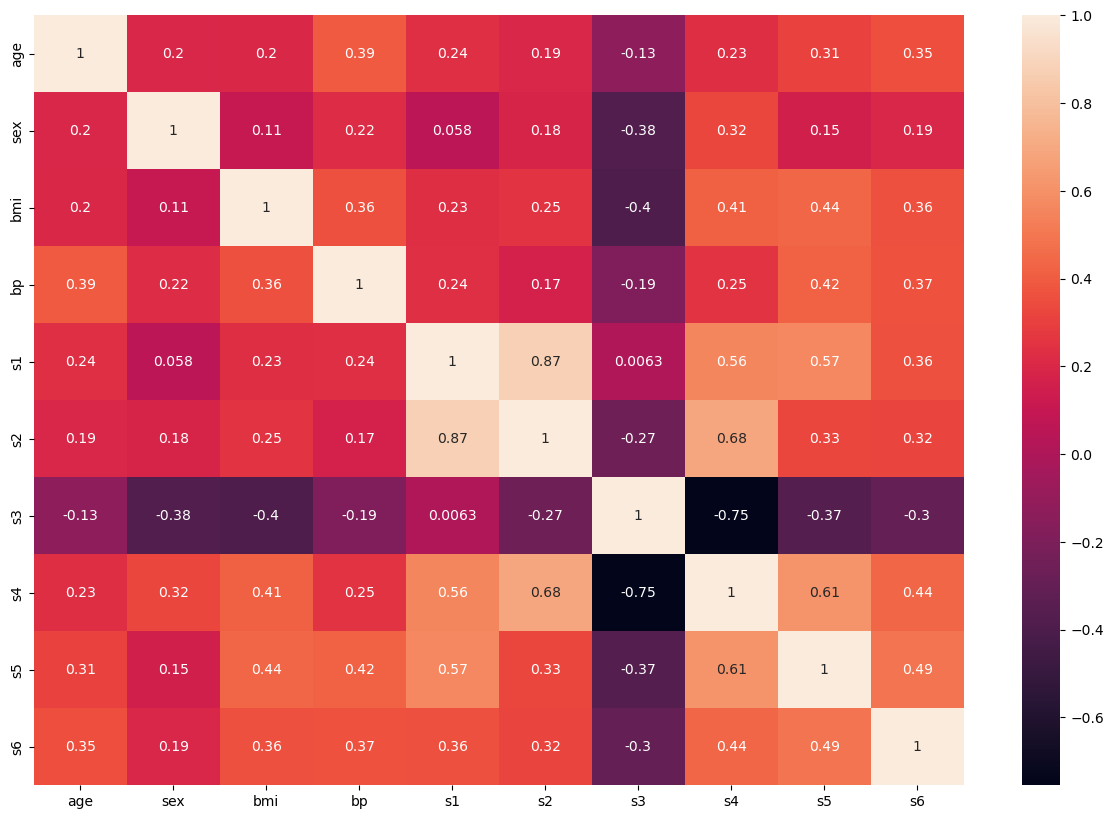

In [21]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(x_train.corr(), annot=True)

In [23]:
from sklearn.tree import DecisionTreeRegressor
treeregressor = DecisionTreeRegressor()
treeregressor.fit(x_train, y_train)

DecisionTreeRegressor()

# Hyperparameter Tuning

In [26]:
param = {
    'criterion':['squared_error', 'friedman_mse', "absolute_error", 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto', 'sqrt', 'log2']
}

In [28]:
from sklearn.model_selection import GridSearchCV

In [50]:
regressor = DecisionTreeRegressor()

In [60]:
grid = GridSearchCV(regressor, param_grid = param, cv=5, scoring='neg_mean_squared_error')
# scoring is different for different models
# scoring - 'accuracy' can't be used for Regressor, it is used for classification
# There are different scoring parameters for different tasks like classification, clustering, regression

In [62]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [72]:
gd=grid.best_params_
gd

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [74]:
# Predictions
y_pred = grid.predict(x_test)

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [78]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.3281269493338431
53.232439834244005
4251.391682230412


In [84]:
Dmodel = DecisionTreeRegressor(criterion=gd['criterion'], max_depth=gd['max_depth'], max_features=gd['max_features'], splitter=gd['splitter'])

In [88]:
Dmodel.fit(x_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features='sqrt',
                      splitter='random')

[Text(0.5625, 0.9, 'x[7] <= 0.081\npoisson = 18.919\nsamples = 309\nvalue = 152.738'),
 Text(0.3333333333333333, 0.7, 'x[3] <= -0.036\npoisson = 18.495\nsamples = 291\nvalue = 148.948'),
 Text(0.16666666666666666, 0.5, 'x[7] <= 0.004\npoisson = 13.397\nsamples = 75\nvalue = 115.68'),
 Text(0.08333333333333333, 0.3, 'x[6] <= -0.01\npoisson = 9.5\nsamples = 57\nvalue = 100.351'),
 Text(0.041666666666666664, 0.1, 'poisson = 10.893\nsamples = 16\nvalue = 124.0'),
 Text(0.125, 0.1, 'poisson = 7.508\nsamples = 41\nvalue = 91.122'),
 Text(0.25, 0.3, 'x[4] <= 0.069\npoisson = 13.368\nsamples = 18\nvalue = 164.222'),
 Text(0.20833333333333334, 0.1, 'poisson = 13.953\nsamples = 15\nvalue = 174.4'),
 Text(0.2916666666666667, 0.1, 'poisson = 0.042\nsamples = 3\nvalue = 113.333'),
 Text(0.5, 0.5, 'x[3] <= -0.005\npoisson = 18.429\nsamples = 216\nvalue = 160.5'),
 Text(0.4166666666666667, 0.3, 'x[2] <= 0.014\npoisson = 15.159\nsamples = 75\nvalue = 131.933'),
 Text(0.375, 0.1, 'poisson = 12.828\nsam

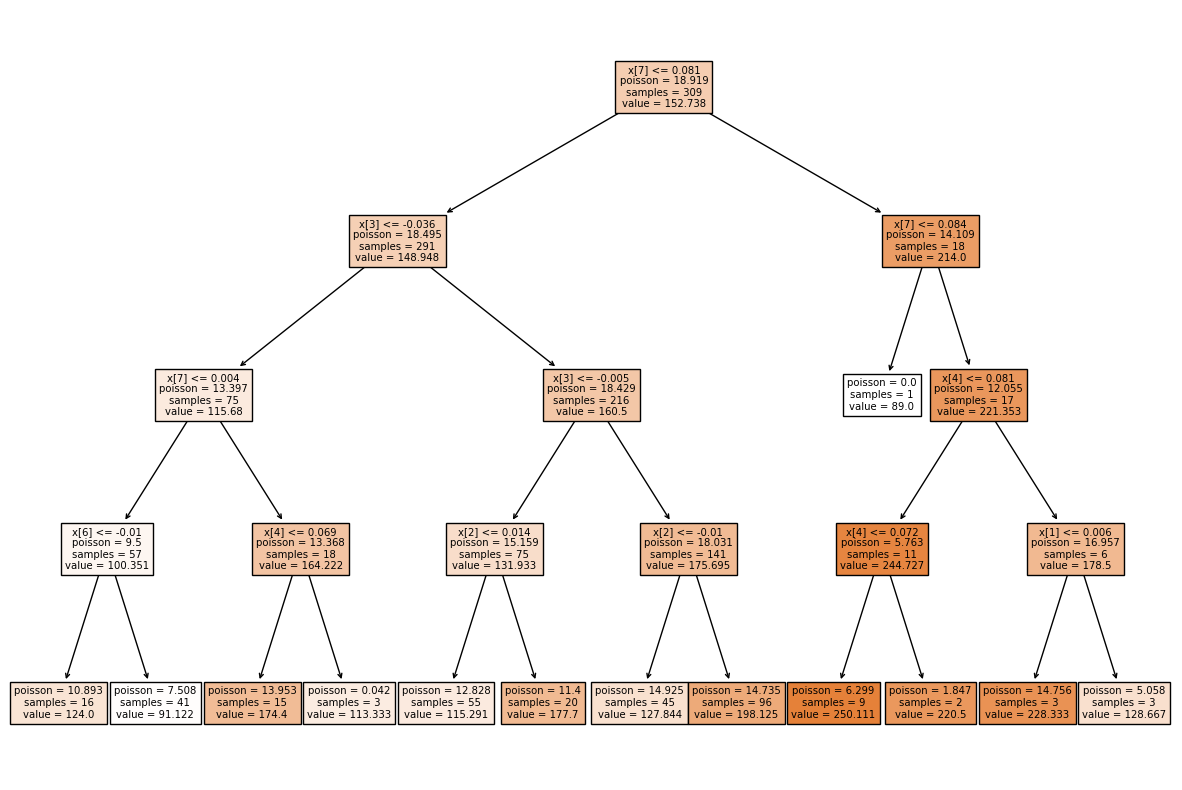

In [90]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(Dmodel, filled=True)